In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
N = 10000
T = 50

strata = [1, 2, 3, 4, 5]

stratum = np.random.choice(strata, size=N)


y = np.vstack([list(range(T)) for _ in range(N)])
y = np.sin(np.multiply(stratum, y.T) / 10).T
epsilon_y = np.random.normal(size=(N, T))
y = y + epsilon_y

df = pd.DataFrame(y)
df['stratum'] = stratum

<AxesSubplot:>

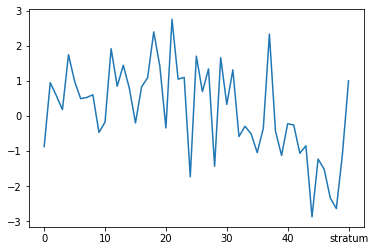

In [4]:
df.loc[0].plot()

<AxesSubplot:>

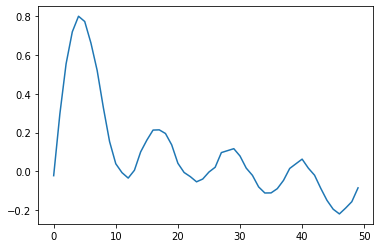

In [5]:
df[range(T)].mean().plot()

In [8]:
df['p_s'] = 1. / (1. + np.exp(-df['stratum']+2))
df['S'] = np.random.binomial(1, p=df['p_s'])

<AxesSubplot:>

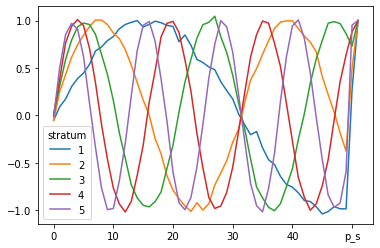

In [9]:
df[df.S==1].groupby('stratum').mean().T.plot()

<AxesSubplot:>

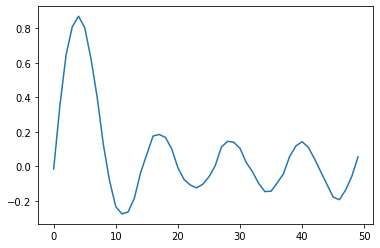

In [10]:
df[df.S==1][range(T)].mean().plot()

<AxesSubplot:>

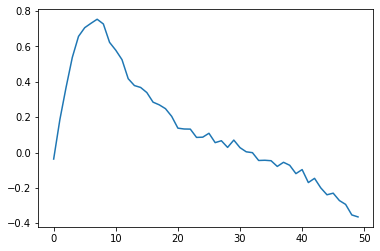

In [11]:
df[df.S==0][range(T)].mean().plot()

In [15]:
df.groupby('stratum').mean()['S']

stratum
1    0.286693
2    0.497502
3    0.733596
4    0.878183
5    0.945426
Name: S, dtype: float64

In [20]:
train_x = df[df.S==1][list(range(20)) + ['stratum']]
train_x = train_x.groupby('stratum').sum().T
train_x

stratum,1,2,3,4,5
0,-30.185749,-52.679881,-1.975593,18.874678,-32.154262
1,52.428278,246.278932,460.702838,667.553487,910.370451
2,101.164196,428.390801,877.018603,1343.267119,1551.416838
3,177.538129,609.477519,1178.813734,1652.278781,1764.244139
4,227.505294,740.262552,1387.577992,1776.386992,1654.914098
5,261.006994,842.179439,1447.732860,1666.917546,1132.423746
6,315.091953,931.271804,1425.538950,1247.968063,237.653600
7,397.475286,1001.374515,1273.358929,609.459814,-609.119642
8,422.112965,1000.911055,962.351965,-156.518087,-1383.140836
9,461.753545,954.737399,646.367286,-807.023938,-1807.841196


In [21]:
train_y = df[range(20)].sum()
train_y

0     -221.857860
1     2962.313221
2     5538.680919
3     7185.426892
4     7989.030280
5     7717.803859
6     6607.540831
7     5200.028799
8     3283.466921
9     1536.814310
10     391.832452
11     -66.092158
12    -345.763855
13      56.335757
14    1000.571558
15    1607.276571
16    2126.921043
17    2138.147408
18    1950.242403
19    1365.874609
dtype: float64

In [22]:
train_x['y'] = train_y

In [23]:
from statsmodels.api import OLS

train_x['intercept'] = 1

model = OLS(endog=train_x['y'],
            exog=train_x[strata + ['intercept']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5796.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.09e-22
Time:                        21:10:29   Log-Likelihood:                -110.23
No. Observations:                  20   AIC:                             232.5
Df Residuals:                      14   BIC:                             238.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              3.3993      0.373      9.116      0.000       2.599       4.199
2              2.1534      0.295      7.304      0.000       1.521       2.786
3              1.2849      0.192      6.708      0.000       0.874       1.696
4              1.2074      0.100     12.030      0.000       0.992       1.423
5              1.0256      0.048     21.389      0.000       0.923       1.128
intercept    -32.6967     54.651     -0.598      0.559    -149.912      84.518
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                0.649
Skew:                           0.311   Prob(JB):                        0.723
Kurtosis:                       3.627   Cond. No.                     5.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
0.2*len(df) / len(df[df.S==1])

0.3005259203606311